# Ad Bandit 

![title](ad_bandit_pic.png)

# Load Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Greedy Action Function

In [2]:
def greedy(q_vals, epsilon):
    
    # Randomly select action with probability epsilon
    if np.random.uniform() < epsilon:
        g_action = np.random.choice(actions)
        
    # Select the best action for the given state with probability 1-epsilon
    else:
        q_vals_max = np.where(q_vals==q_vals.max())[0]
        g_action = np.random.choice(q_vals_max)
    
    return g_action

# Ad Bandit Function

In [3]:
def ad_bandit(probs, episodes, epsilon):
    
    # Number of times each action is taken
    n_table = np.zeros(len(probs))

    # Expected reward for each action
    q_table = np.zeros(len(probs))

    # The reward for each episode
    reward = []

    # Run experiment
    for i in range(episodes):
    
        # Find which action to take - Exploration vs Exploitation
        new_action = greedy(q_table, epsilon)
    
        # Count number of times each action is selected
        n_table[new_action] += 1
    
        # Save the reward recieved for each epsiode
        reward.append( np.random.binomial(n=1000, p=probs[new_action], size=1)[0] )
    
        # Update the expected reward for each action 
        q_table[new_action] = q_table[new_action] + ( (1/n_table[new_action]) * ( reward[-1] - q_table[new_action] ) )
        
    # Return the goods
    return n_table, q_table, reward

# Run the Advertisement Experiment

In [4]:
# Set seed
np.random.seed(802)

# Number of ads
actions = 5

# Probability of an individual clicking on each advertisement
probs = np.random.uniform(low=0, high=0.1, size=actions).round(2)

# Exploration rate
epsilon = 0.25

# Number of episodes
episodes = 10000

# Run experiment
n_table, q_table, reward = ad_bandit(probs, episodes, epsilon)

# View Results

In [5]:
print("The average number of clicks per 1000 people is", sum(reward)/len(reward), "for", episodes, "episodes.")

The average number of clicks per 1000 people is 81.3132 for 10000 episodes.


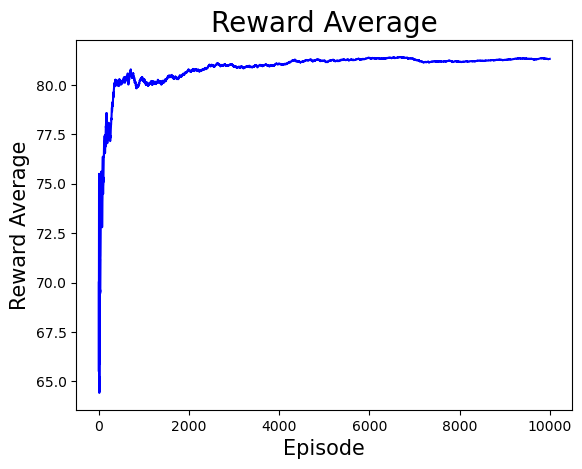

In [6]:
reward_ave = np.cumsum(reward) / (np.array(range(episodes))+1)
plt.plot(reward_ave, color="blue")
plt.title("Reward Average", fontsize=20)
plt.xlabel("Episode", fontsize=15)
plt.ylabel("Reward Average", fontsize=15)
plt.show()

In [7]:
pd.DataFrame({"Advertisement":range(1,len(probs)+1), "Number of times each ad selected":n_table, \
              "True number of clicks per 1000 people":probs*1000, "Expected clicks per 1000 people":q_table.round(2)})

,Advertisement,Number of times each ad selected,True number of clicks per 1000 people,Expected clicks per 1000 people
0,1,524.0,50.0,50.27
1,2,473.0,50.0,49.98
2,3,555.0,80.0,79.61
3,4,7934.0,90.0,89.96
4,5,514.0,10.0,10.13


In [8]:
if np.argmax(q_table)==np.argmax(probs):
    print("Choose Advertisement", np.argmax(q_table)+1)
else:
    print("Run more experiments and/or change the exlopration rate")

Choose Advertisement 4
